## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle.

The dataset contains a comprehensive list of the most famous songs and most streamed songs as listed on Spotify. 

No need to dowload it, is is already in this directory under `Popular_Spotify_Songs.csv`

**For these exercises and the upcoming studio, we will be using the `matplotlib` library**

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

You can use Excel to open the csv directly and acquant yourself with the data. Then based on what you see, you can make cleaning decisions. 

I have included my work below. Feel free to build on it as needed.

**To understand what a column represents in the dataset, you should google `Spotify [column name] data explanation`**

In [3]:
# import all librarys and modules needed
import pandas as pd
import numpy
import matplotlib.pyplot as plt

# We need to include an encoding tag with this dataset
## Otherwise, we will get an error trying to read non-latin characters in the dataset
df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

df.drop_duplicates()
df = pd.DataFrame(df)

# The below command gets rid of one weird row of 'streams' data for a song.
## Using Excel or pandas, find what that value is and think why it would cause issues when trying
## to classify this column as 'numeric' data
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# We need to specifically convert these fields to be numeric, since they are imported
## by default as string data
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')

# It'll be beneficial to have the column names of the data on hand
df.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### Creating Visualizations

Now that the data is ready, we will create a number of different visualizations.

We have included a graphic for `Abela's Chart Suggestions` below. 

It was used to determine the best chart type for the questions in this exercise.

![chart-suggestions.png](./Abelas-Chart-Selection-Diagram.jpg)

# Exercise Explanation

Each section of this file will be broken up by chart type.

For each chart type, we will provide you with a full data visualization example that answers a question for the Spotify dataset.

It will then be your turn to answer a different question with your own data visualization.

# Line Charts

#### Example - Single Line Chart

Question:

**What is the total number of streams for all songs, plotted over `release_year`?**

Text(0, 0.5, 'Total Streams (in billions)')

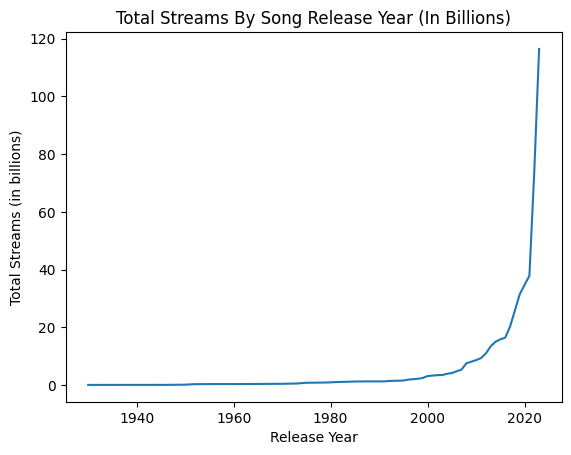

In [4]:
# Single line chart
years = numpy.sort(df["released_year"].unique())
sum_by_year = numpy.sort(df.groupby("released_year")["streams"].sum())

# converting to billions
for i in range(len(sum_by_year)):
	sum_by_year[i] = sum_by_year[i] / 1000000000

plt.plot(years, sum_by_year)
plt.title("Total Streams By Song Release Year (In Billions)")
plt.xlabel("Release Year")
plt.ylabel("Total Streams (in billions)")



#### Your Turn

Question:

**What is the total number of times all songs were added to a Spotify playlist, plotted over `release_year`?**

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


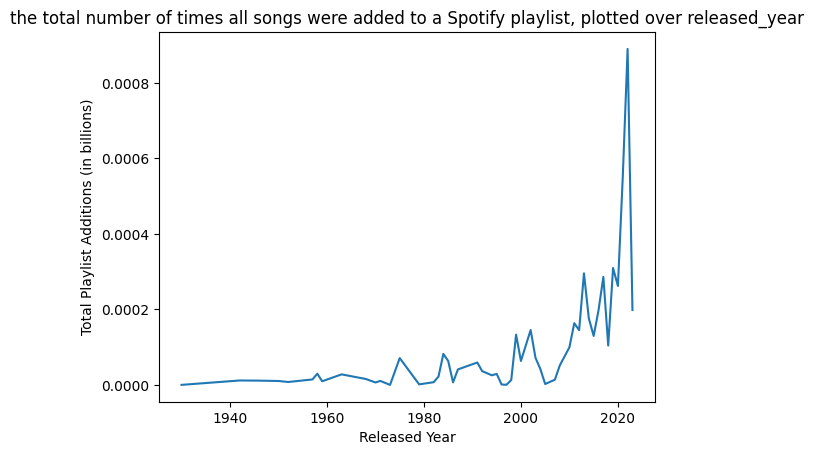

In [5]:
# Code Here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

years = np.sort(df["released_year"].unique())
added_years = df.groupby("released_year")["in_spotify_playlists"].sum() / 1000000000

# Plot
plt.plot(years, added_years)
plt.title("the total number of times all songs were added to a Spotify playlist, plotted over released_year")
plt.xlabel("Released Year")
plt.ylabel("Total Playlist Additions (in billions)")
plt.show()




#### Example - Multi Line Chart

**For songs released after 2009, create a multi-line chart with two data variables**
1. Line showing total number of streams for songs with a `Major` mode, plotted by release year
2. Line showing total number of streams for songs with a `Minor` mode, plotted by release year

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


C:\Users\charl\AppData\Local\Temp\ipykernel_37632\2863046413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['streams'] = pd.to_numeric(df_filtered['streams'], errors='coerce')


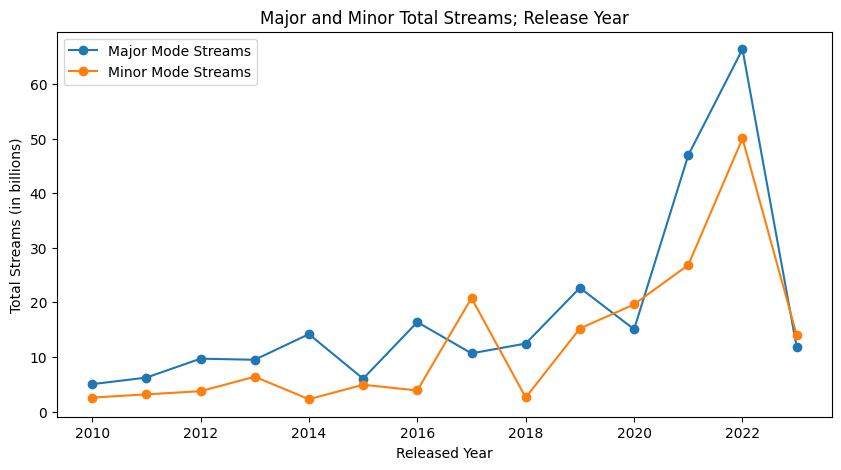

In [7]:
# Multi Line chart 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

# Filter data after 2009 and for Major and Minor modes
df_filtered = df[(df["released_year"] > 2009) & (df["mode"].isin(['Major', 'Minor']))]

df_filtered['streams'] = pd.to_numeric(df_filtered['streams'], errors='coerce')

streams_by_year_mode = df_filtered.groupby(["released_year", "mode"])["streams"].sum().unstack()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(streams_by_year_mode.index, streams_by_year_mode['Major'] / 1e9, label='Major Mode Streams', marker='o')
plt.plot(streams_by_year_mode.index, streams_by_year_mode['Minor'] / 1e9, label='Minor Mode Streams', marker='o')
plt.title("Major and Minor Total Streams; Release Year")
plt.xlabel("Released Year")
plt.ylabel("Total Streams (in billions)")
plt.legend()
plt.show()



#### Your Turn

**For songs released after 2009, create a multi line chart with three data variables**
1. Line showing total times all songs were added to a Spotify playlist, plotted by release year 
1. Line showing total times all songs were added to an Apple playlist, plotted by release year 
1. Line showing total times all songs were added to a Deezer playlist, plotted by release year 

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


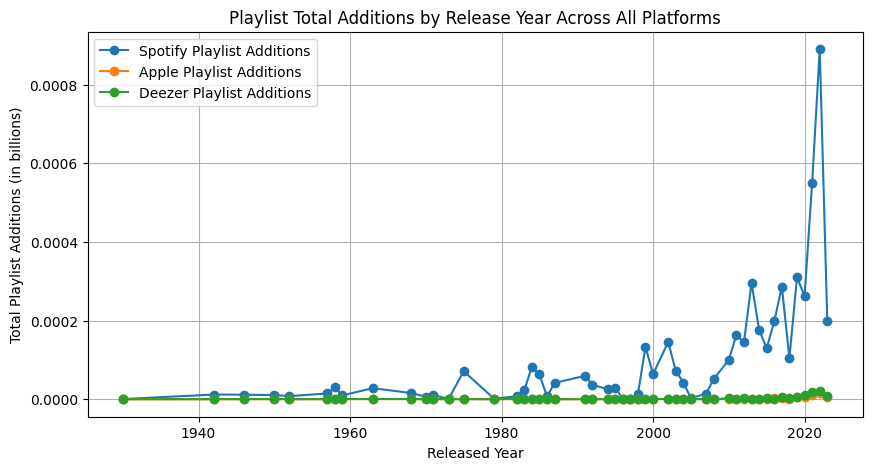

In [8]:
# Code Here
# Multi Line chart 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

# Converting playlist counts to billions and grouping by release year
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

spotify_years = df.groupby("released_year")["in_spotify_playlists"].sum() / 1000000000
apple_years = df.groupby("released_year")["in_apple_playlists"].sum() / 1000000000
deezer_years = df.groupby("released_year")["in_deezer_playlists"].sum() / 1000000000

# Plot
plt.figure(figsize=(10, 5))
plt.plot(spotify_years.index, spotify_years.values, label='Spotify Playlist Additions', marker='o')
plt.plot(apple_years.index, apple_years.values, label='Apple Playlist Additions', marker='o')
plt.plot(deezer_years.index, deezer_years.values, label='Deezer Playlist Additions', marker='o')
plt.title("Playlist Total Additions by Release Year Across All Platforms")
plt.xlabel("Released Year")
plt.ylabel("Total Playlist Additions (in billions)")
plt.legend()
plt.grid(True)
plt.show()



# Bar Charts

#### Example - Vertical Bar Chart

Question:

**What is the total number of streams for 'Major' mode and 'Minor' mode songs in the dataset?**

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


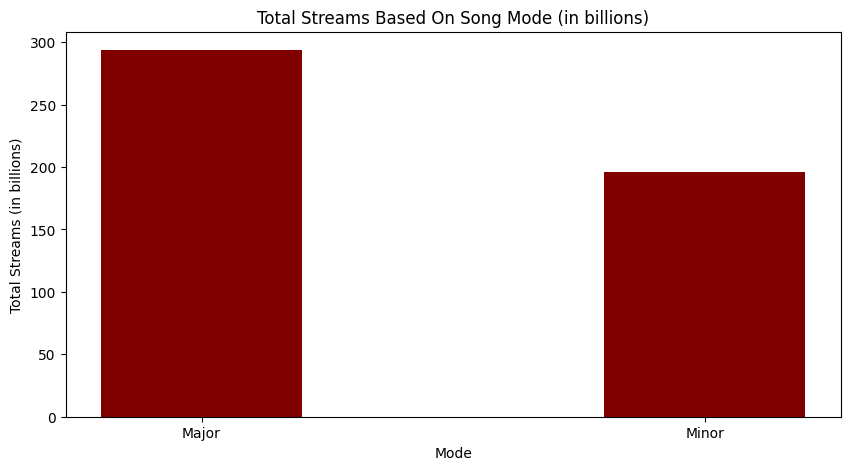

In [9]:
# keys = list(df[df["mode"].notnull()]["mode"].unique())
# streams_by_mode = []

# # in billions
# for k in keys:
# 	sum = int(df[df["mode"] == k]["streams"].sum() / 1000000000)
# 	streams_by_mode.append(sum)

# plt.bar(x=keys, height=streams_by_mode,width=.4, color ='maroon')

# plt.title("Total Streams Based On Song Mode (in billions)")
# plt.xlabel("Mode")
# plt.ylabel("Total Streams (in billions)")


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df.dropna(subset=['streams'], inplace=True)

keys = df[df["mode"].notnull()]["mode"].unique()
streams_by_mode = []

for k in keys:
    sum_streams = df[df["mode"] == k]["streams"].sum() / 1000000000
    streams_by_mode.append(sum_streams)

plt.figure(figsize=(10, 5))
plt.bar(keys, streams_by_mode, width=0.4, color='maroon')
plt.title("Total Streams Based On Song Mode (in billions)")
plt.xlabel("Mode")
plt.ylabel("Total Streams (in billions)")
plt.show()



#### Your Turn

Question:

**What is the total number of times all songs were `in_spotify_playlists`, `in_apple_playlists`, and `in_deezer_playlists`?**


Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


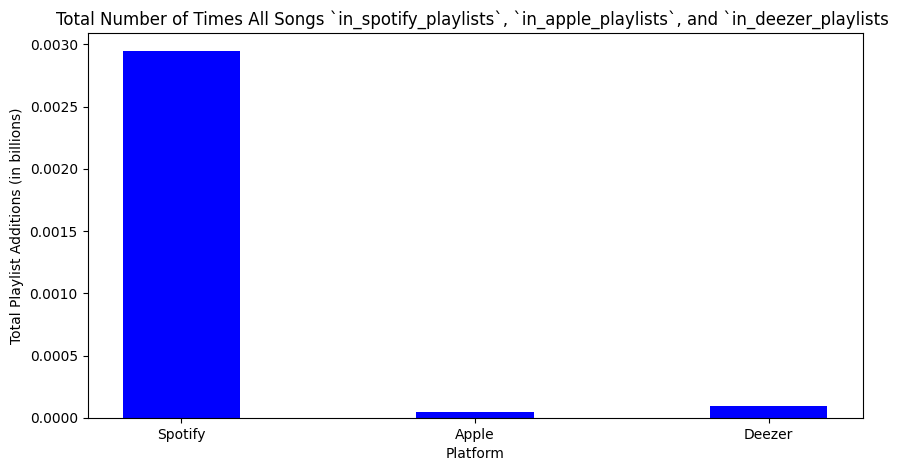

In [22]:
# Code Here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

df.dropna(subset=['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], inplace=True)

total_spotify = df['in_spotify_playlists'].sum() / 1000000000
total_apple = df['in_apple_playlists'].sum() / 1000000000
total_deezer = df['in_deezer_playlists'].sum() / 1000000000

platforms = ['Spotify', 'Apple', 'Deezer']
totals = [total_spotify, total_apple, total_deezer]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(platforms, totals, color='blue', width=0.4)
plt.title("Total Number of Times All Songs `in_spotify_playlists`, `in_apple_playlists`, and `in_deezer_playlists ")
plt.xlabel("Platform")
plt.ylabel("Total Playlist Additions (in billions)")
plt.show()


#### Example - Horizontal Bar Chart

Question:

**What is the total streams of all songs, organized by `artist_count`?**

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


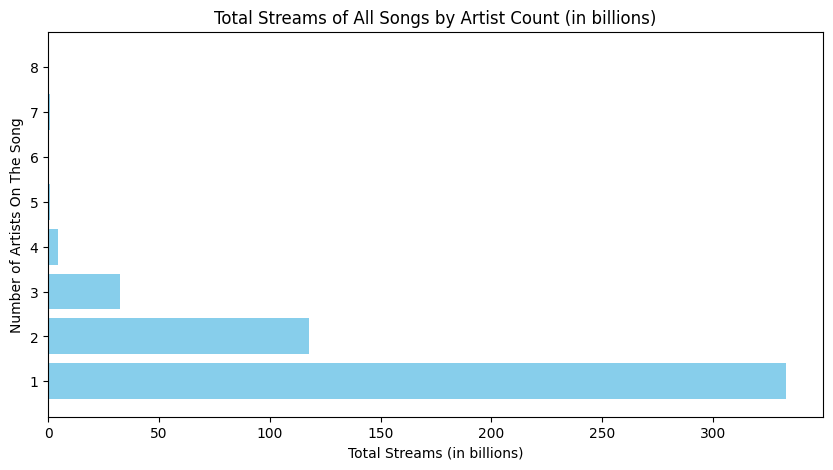

In [11]:
# Horizontal bar chart
# keys = list(df[df["key"].notnull()]["artist_count"].unique())

# streams_by_artist_count = []

# # in billions
# for k in keys:
# 	sum = int(df[df["artist_count"] == k]["streams"].sum() / 1000000000)
# 	streams_by_artist_count.append(sum)

# plt.barh(keys, streams_by_artist_count, align='center')
# plt.title("Total Streams of All Songs by Artist Count (in billions)")
# plt.ylabel("Number of Artists On The Song (in billions)")
# plt.xlabel("Total Streams (in billions)")


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['artist_count'] = pd.to_numeric(df['artist_count'], errors='coerce')

df.dropna(subset=['streams', 'artist_count'], inplace=True)

artist_count_streams = df.groupby('artist_count')['streams'].sum() / 1000000000

# Plot
plt.figure(figsize=(10, 5))
plt.barh(artist_count_streams.index, artist_count_streams.values, color='skyblue')
plt.title("Total Streams of All Songs by Artist Count (in billions)")
plt.ylabel("Number of Artists On The Song")
plt.xlabel("Total Streams (in billions)")
plt.show()


#### Your Turn

Question:
**What is the total streams for all songs, organized by `key`?**

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


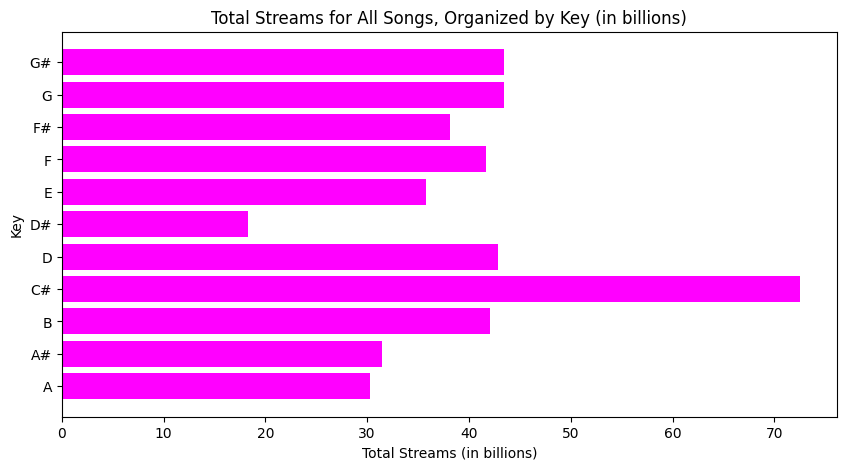

In [24]:
# Code Here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df.dropna(subset=['streams'], inplace=True)

key_streams = df.groupby('key')['streams'].sum() / 1000000000

# Plot
plt.figure(figsize=(10, 5))
plt.barh(key_streams.index, key_streams.values, color='fuchsia')
plt.title("Total Streams for All Songs, Organized by Key (in billions)")
plt.xlabel("Total Streams (in billions)")
plt.ylabel("Key")
plt.show()


#### Example - Grouped Bar Chart


Question:

**For songs released between 2020 and 2022, what is the total streams of all songs organized by `mode`?**

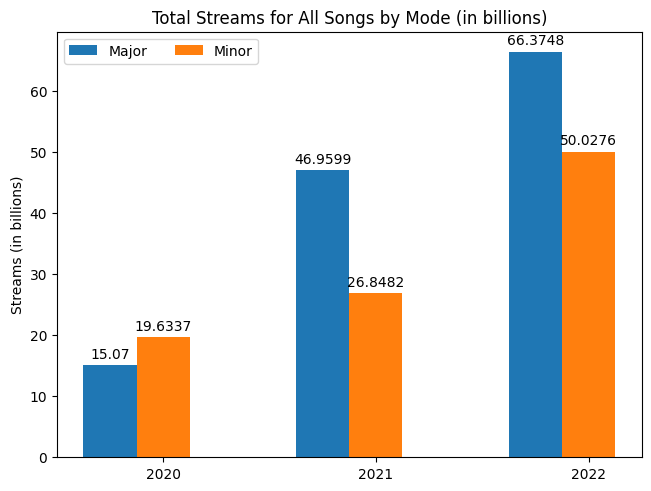

In [157]:
# Grouped bar chart

keys = list(df[df["mode"].notnull()]["mode"].unique())

data = df.loc[(df["released_year"] > 2019) & (df["released_year"] < 2023)]

years = [2020, 2021, 2022]
x = numpy.arange(len(years))
width = .25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

key_streams = {}

for k in keys:
	if k not in key_streams:
		key_streams[k] = []
	for y in years:
		# in billions
		sum = data.loc[(data["mode"] == k) & (data["released_year"] == y)]["streams"].sum() / 1000000000
		key_streams[k].append(sum)

for att, measurement in key_streams.items():
	offset = width * multiplier
	rects = ax.bar(x + offset, measurement, width, label=att)
	ax.bar_label(rects, padding=3)
	multiplier += 1

ax.set_ylabel('Streams (in billions)')
ax.set_title('Total Streams for All Songs by Mode (in billions)')
ax.set_xticks(x + width, years)
ax.legend(loc='upper left', ncols=3)

plt.show()
	


#### Your Turn

Question:

**For songs released between 2020 and 2022, what is the total number of times all songs were `in_spotify_playlists`, `in_apple_playlists`, and `in_deezer_playlists`?**

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


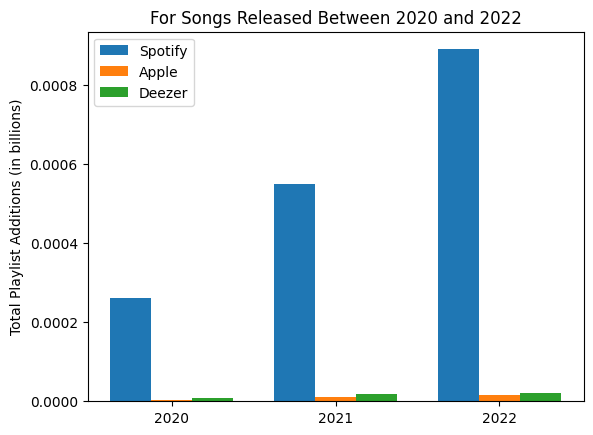

In [14]:
# Code Here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

df.dropna(subset=['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], inplace=True)

data = df[(df['released_year'] >= 2020) & (df['released_year'] <= 2022)]
years = [2020, 2021, 2022]
x = np.arange(len(years))
width = 0.25 

fig, ax = plt.subplots()

totals_spotify = [data[data['released_year'] == year]['in_spotify_playlists'].sum() / 1000000000 for year in years]
totals_apple = [data[data['released_year'] == year]['in_apple_playlists'].sum() / 1000000000 for year in years]
totals_deezer = [data[data['released_year'] == year]['in_deezer_playlists'].sum() / 1000000000 for year in years]

# Plot
rects1 = ax.bar(x - width, totals_spotify, width, label='Spotify')
rects2 = ax.bar(x, totals_apple, width, label='Apple')
rects3 = ax.bar(x + width, totals_deezer, width, label='Deezer')

ax.set_ylabel('Total Playlist Additions (in billions)')
ax.set_title('For Songs Released Between 2020 and 2022')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

plt.show()





# Scatter Plot

#### Example - Scatter Plot

Question:
**For songs released between 2000 and 2009, what is the relationship between valence and energy for songs in the dataset?**

**Valence**: describes the musical positiveness conveyed by a track. 

Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry).

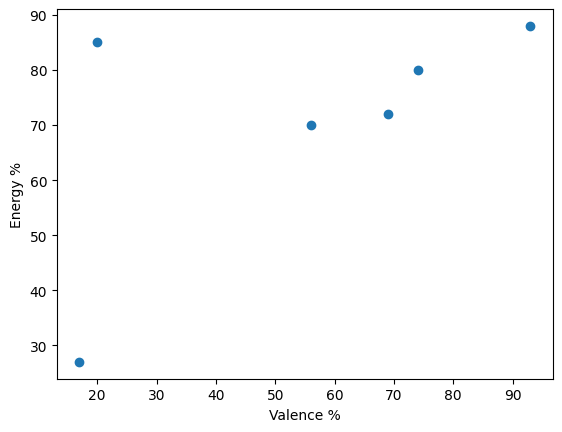

In [162]:
# scatter plot
data = df.loc[(df["released_year"] > 1999) & (df["released_year"] < 2010)]

plt.scatter(x=data['valence_%'], y=data['energy_%'])
plt.xlabel('Valence %')
plt.ylabel('Energy %')
plt.show()

#### Your Turn

Question:

**For songs released between 2016 and 2019, what is the relationship between danceability and speechiness for songs in the dataset?**

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


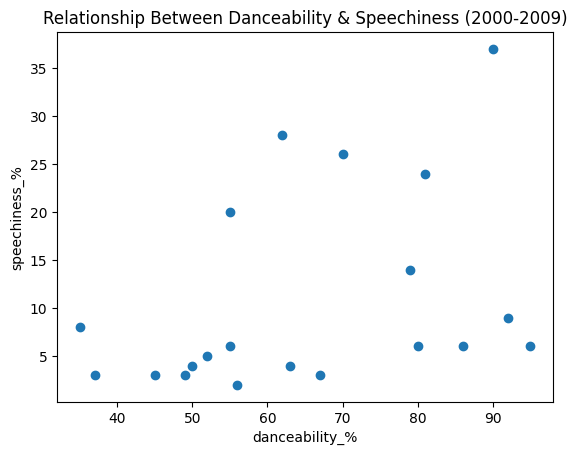

In [18]:
# Code Here

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

if 'danceability_%' not in df.columns or 'speechiness_%' not in df.columns:
    print("Column names are incorrect. Available columns are:")
    print(df.columns)
else:
    data = df.loc[(df["released_year"] > 1999) & (df["released_year"] < 2010)]

    # Plot
    plt.scatter(x=data['danceability_%'], y=data['speechiness_%'])
    plt.title("Relationship Between Danceability & Speechiness (2000-2009)")
    plt.xlabel('danceability_%')
    plt.ylabel('speechiness_%')
    plt.show()








# Histogram

#### Example - Histogram

Question:

**Create a graph that groups all songs in the dataset based on their danceability percentage**

(array([  7.,  31.,  38.,  89., 122., 139., 202., 175.,  99.,  51.]),
 array([23. , 30.3, 37.6, 44.9, 52.2, 59.5, 66.8, 74.1, 81.4, 88.7, 96. ]),
 <BarContainer object of 10 artists>)

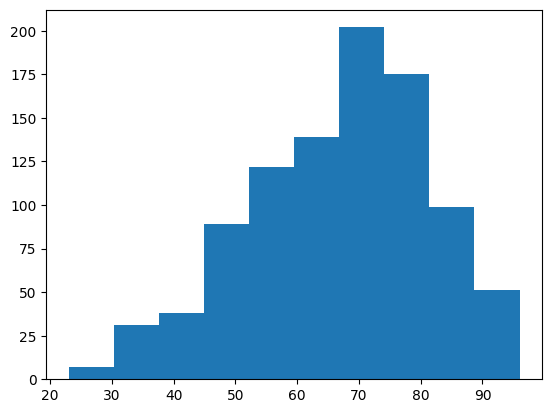

In [170]:
# histogram
plt.hist(df['danceability_%'])


#### Your Turn

Question:

**Create a graph that groups all songs in the dataset with over 1 billion streams by their bpm**

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


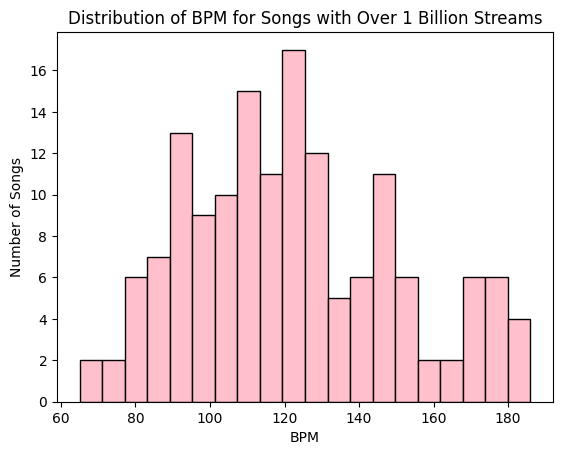

In [28]:
# Code Here

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

data = df[df['streams'] > 1000000000]

# Plot
plt.hist(data['bpm'], bins=20, color='pink', edgecolor='black')
plt.title("Distribution of BPM for Songs with Over 1 Billion Streams")
plt.xlabel('BPM')
plt.ylabel('Number of Songs')
plt.show()


# Pie Chart

#### Example - Pie Chart

Question

**Of the Adele songs in the dateset, what is each song's portion of her total streams?**

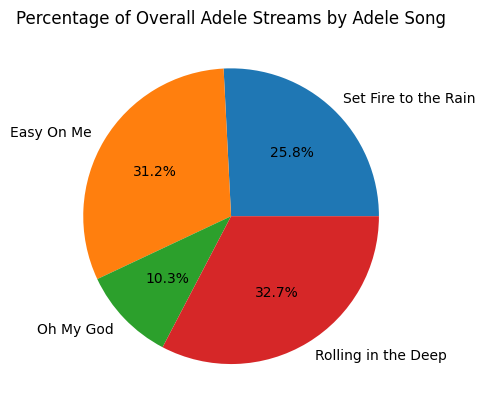

In [182]:
# pie chart
data = df.loc[(df['artist(s)_name'].str.startswith('Adele', na=False))]
data

plt.pie(data['streams'], labels=data['track_name'], autopct='%1.1f%%')
plt.title('Percentage of Overall Adele Streams by Adele Song')
plt.show()

#### Your Turn

Prompt:
**Breakdown the percentage of Dua Lipa's song streams based on `key`**

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


C:\Users\charl\AppData\Local\Temp\ipykernel_37632\2234713651.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
C:\Users\charl\AppData\Local\Temp\ipykernel_37632\2234713651.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['streams'], inplace=True)


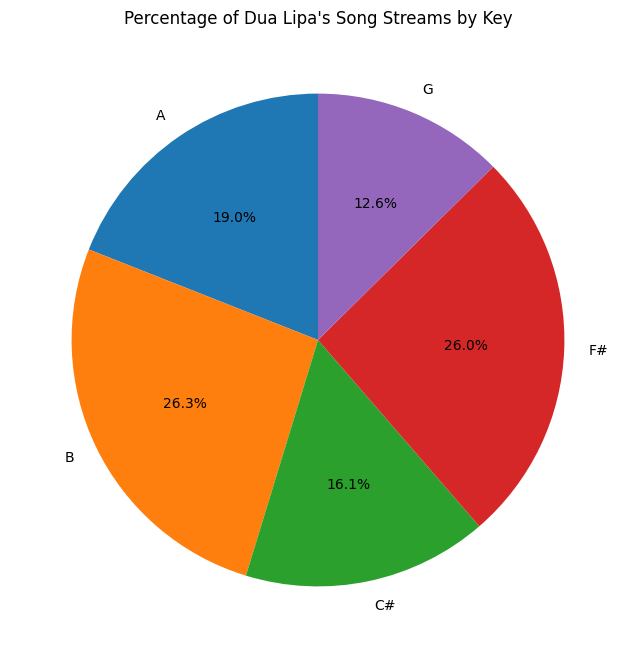

In [19]:
# Code Here

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

data = df[df["artist(s)_name"].str.contains("Dua Lipa", na=False)]

data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

data.dropna(subset=['streams'], inplace=True)

key_streams = data.groupby('key')['streams'].sum()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(key_streams, labels=key_streams.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Dua Lipa's Song Streams by Key")
plt.show()


# Bonus Missions

We wanted to make sure these exercises were approachable. To do so, we stuck to some pretty simple data analysis questions.

But, this is a very interesting dataset that could potentially answer deeper questions for these songs.

We are going to include a list of questions that would be interesting to answer with the dataset.

You can then do analysis and/or design visualizations to answer these questions.

1. For songs released between 1980 and 1989, chart the trend of the top song's (most streams for a song of that release year) danceability
2. For songs released between 1990 and 1999, chart the trend of the top song's (most streams for a song of that release year) valence
3. Find the `key` and `mode` combination that will most likely correlate with a top streaming song
4. Chart the relationship between valence and bpm for songs released in the 80s, 90s, and 2000s
5. Chart the relationship between a song's liveness and it's likelihood to be streamed more
6. What's the best day of the month to release a song on to get the most streams? 
7. For song's with a valence under 20%, which release month leads to the highest stream count?


#### Note from Christian:

Apologies for using the word 'leads' here, or any other language that implies 'causation' from a condition found in the data. 

# We should always remember that correlation != causation when doing analysis

Column names: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


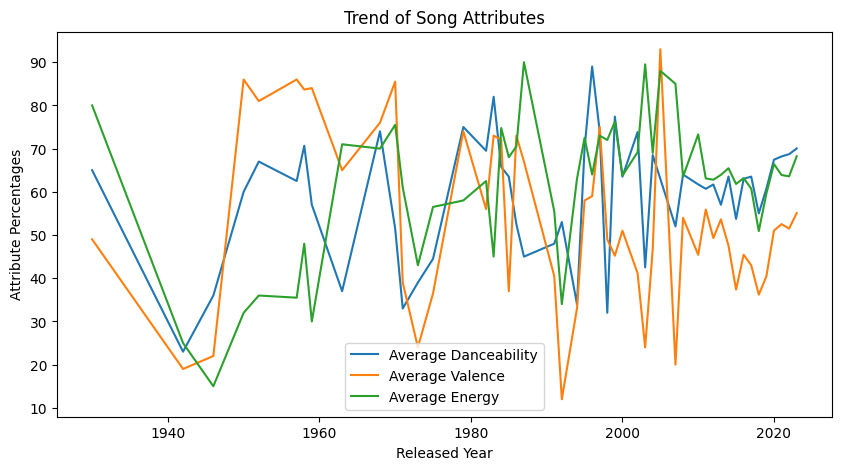

In [21]:
# Code here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')

print("Column names:", df.columns)

df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')
df['valence_%'] = pd.to_numeric(df['valence_%'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')

df.dropna(subset=['danceability_%', 'valence_%', 'energy_%'], inplace=True)

years = np.sort(df["released_year"].unique())
danceability_avg = df.groupby("released_year")['danceability_%'].mean()
valence_avg = df.groupby("released_year")['valence_%'].mean()
energy_avg = df.groupby("released_year")['energy_%'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(years, danceability_avg, label='Average Danceability')
plt.plot(years, valence_avg, label='Average Valence')
plt.plot(years, energy_avg, label='Average Energy')
plt.title("Trend of Song Attributes")
plt.xlabel("Released Year")
plt.ylabel("Attribute Percentages")
plt.legend()
plt.show()


